In [9]:
import numpy as np

In [10]:
#Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2

In [11]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [12]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)


In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

## Generating Datasets

In [14]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [15]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [16]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


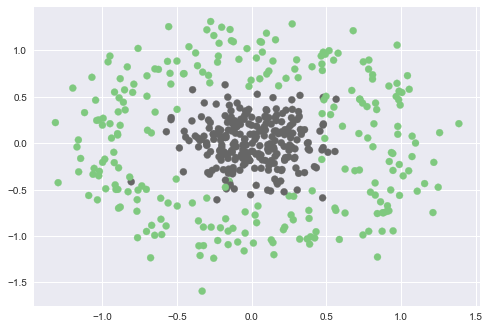

In [17]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [22]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs and (ix%10)==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [23]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [24]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 10 Loss 0.1664
Epoch 20 Loss 0.1159
Epoch 30 Loss 0.0922
Epoch 40 Loss 0.0793
Epoch 50 Loss 0.0711
Epoch 60 Loss 0.0656
Epoch 70 Loss 0.0616
Epoch 80 Loss 0.0585
Epoch 90 Loss 0.0561
Epoch 100 Loss 0.0542
Epoch 110 Loss 0.0526
Epoch 120 Loss 0.0513
Epoch 130 Loss 0.0502
Epoch 140 Loss 0.0492
Epoch 150 Loss 0.0484
Epoch 160 Loss 0.0476
Epoch 170 Loss 0.0470
Epoch 180 Loss 0.0464
Epoch 190 Loss 0.0459
Epoch 200 Loss 0.0454
Epoch 210 Loss 0.0450
Epoch 220 Loss 0.0446
Epoch 230 Loss 0.0443
Epoch 240 Loss 0.0439
Epoch 250 Loss 0.0436
Epoch 260 Loss 0.0433
Epoch 270 Loss 0.0431
Epoch 280 Loss 0.0428
Epoch 290 Loss 0.0426
Epoch 300 Loss 0.0423
Epoch 310 Loss 0.0421
Epoch 320 Loss 0.0419
Epoch 330 Loss 0.0417
Epoch 340 Loss 0.0415
Epoch 350 Loss 0.0413
Epoch 360 Loss 0.0412
Epoch 370 Loss 0.0410
Epoch 380 Loss 0.0409
Epoch 390 Loss 0.0407
Epoch 400 Loss 0.0406
Epoch 410 Loss 0.0404
Epoch 420 Loss 0.0403
Epoch 430 Loss 0.0402
Epoch 440 Loss 0.0400
Epoch 450 Loss 0.0399

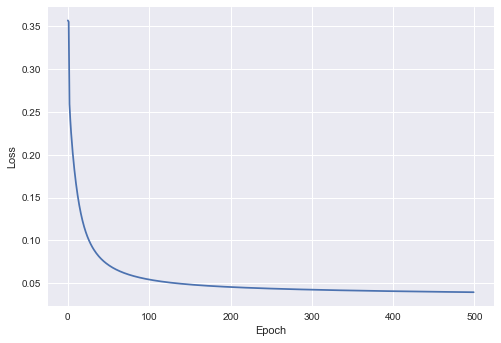

In [25]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

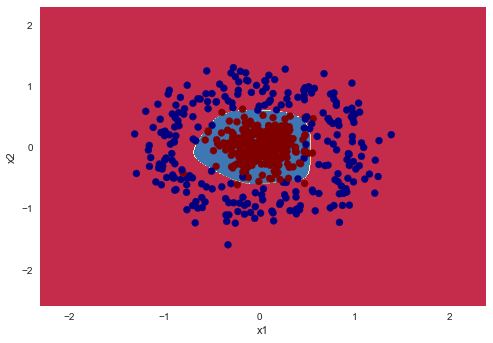

In [27]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## Other Datasets

In [28]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [29]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


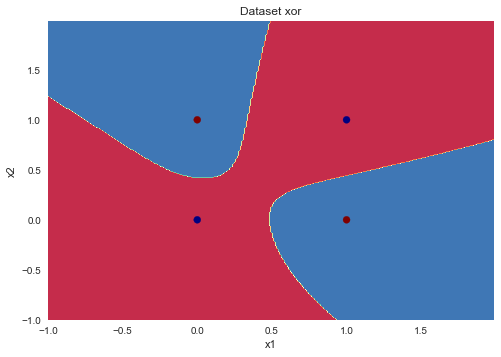

Training Acc 0.9600


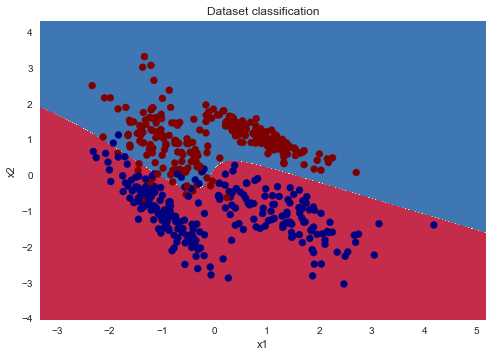

Training Acc 0.9740


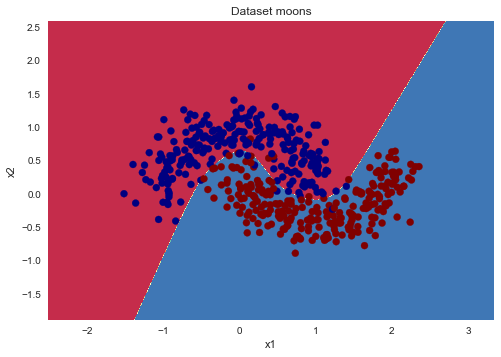

Training Acc 0.9640


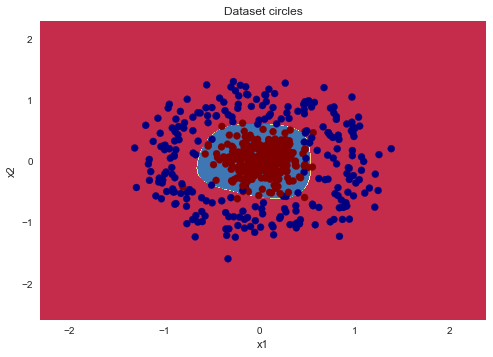

In [31]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False) ## for xor learning rate should be more i.e 0.1 and epochs 200
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()